In [ ]:
import numpy as np
from keras.models import load_model
import matplotlib.pyplot as plt
import tensorflow as tf 
from keras.preprocessing import image as im
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from imutils import paths
import argparse
import os

In [3]:
model_path='/ebsvol/aicelerateData/internuser/Sharmila/simpletrain.h5'

In [5]:
classifier=tf.keras.models.load_model(model_path)

In [7]:
ap = argparse.ArgumentParser()
ap.add_argument("-t", "--test", required=True,help="path to test images")

_StoreAction(option_strings=['-t', '--test'], dest='test', nargs=None, const=None, default=None, type=None, choices=None, help='path to test images', metavar=None)

In [29]:
args = vars(ap.parse_args("--test /ebsvol/aicelerateData/internuser/Sharmila/test".split()))

In [30]:
imagePaths = list(paths.list_images(args["test"]))

Actual_output:non_covid-2.jpg
Model_output: Covid_infected_CT


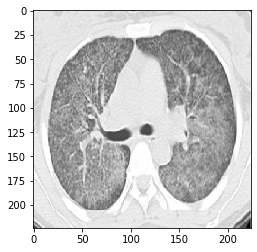

Actual_output:covid-1.png
Model_output: Covid_infected_CT


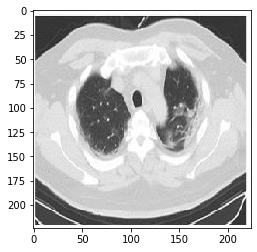

Actual_output:non_covid-3.jpg
Model_output: Non_covid


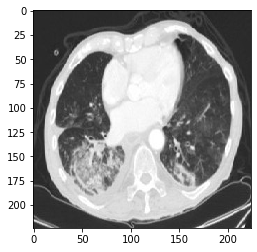

Actual_output:non_covid-1.jpg
Model_output: Covid_infected_CT


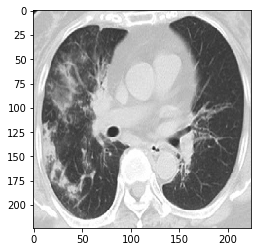

In [41]:
for img in imagePaths:
    i=img
    test_image=im.load_img(img,target_size=(224,224,3))
    test_image1=im.img_to_array(test_image)
    test_image2=np.expand_dims(test_image1,axis=0)
    result=classifier.predict(test_image2)
    res=np.argmax(result)
    label = i.split(os.path.sep)[-1]
    print('Actual_output:{}'.format(label))
    if res==0:
        print('Model_output: Covid_infected_CT')
        plt.imshow(np.uint8(test_image))
        plt.show()
    else:
        print('Model_output: Non_covid')
        plt.imshow(np.uint8(test_image))
        plt.show()